In [21]:
#import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
data = pd.read_csv(r"C:\Users\Lenovo\Downloads\online.csv")

In [4]:
data

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom
...,...,...,...,...,...,...,...,...,...
70859,448575,575063,22804,PINK HANGING HEART T-LIGHT HOLDER,1,2011-11-08 12:32:00,2.95,16764,United Kingdom
70860,19970,537963,21733,RED HANGING HEART T-LIGHT HOLDER,12,2010-12-09 11:30:00,2.95,13369,United Kingdom
70861,264154,560089,23238,SET OF 4 KNICK KNACK TINS LONDON,1,2011-07-14 16:45:00,4.15,12748,United Kingdom
70862,199822,554103,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2,2011-05-22 13:51:00,2.95,15555,United Kingdom


In [5]:
data.dtypes

Unnamed: 0       int64
InvoiceNo        int64
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       int64
Country         object
dtype: object

In [6]:
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])

In [7]:
data.dtypes

Unnamed: 0              int64
InvoiceNo               int64
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object

In [8]:
def get_month(x):
    return dt.datetime(x.year,x.month,1)

In [9]:
data['InvoiceMonth']=data['InvoiceDate'].apply(get_month)

In [10]:
data['CohortMonth']= data.groupby('CustomerID')['InvoiceMonth'].transform('min')


In [11]:
def get_date_element(df,col):
    day=df[col].dt.day
    month=df[col].dt.month
    year=df[col].dt.year
    
    return day , month , year

In [12]:
_,Invoice_month,Invoice_year= get_date_element(data,'InvoiceMonth')
_,Cohort_month,Cohort_year=get_date_element(data,'CohortMonth')

In [13]:
# Cohort index
year_diff=Invoice_year-Cohort_year
month_diff=Invoice_month-Cohort_month

data['CohortIndex']=year_diff*12+month_diff+1

In [14]:
data

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01,7
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01,3
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01,1
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01,2011-11-01,1
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01,2011-02-01,4
...,...,...,...,...,...,...,...,...,...,...,...,...
70859,448575,575063,22804,PINK HANGING HEART T-LIGHT HOLDER,1,2011-11-08 12:32:00,2.95,16764,United Kingdom,2011-11-01,2011-07-01,5
70860,19970,537963,21733,RED HANGING HEART T-LIGHT HOLDER,12,2010-12-09 11:30:00,2.95,13369,United Kingdom,2010-12-01,2010-12-01,1
70861,264154,560089,23238,SET OF 4 KNICK KNACK TINS LONDON,1,2011-07-14 16:45:00,4.15,12748,United Kingdom,2011-07-01,2010-12-01,8
70862,199822,554103,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2,2011-05-22 13:51:00,2.95,15555,United Kingdom,2011-05-01,2010-12-01,6


In [15]:
cohort_data=data.groupby(['CohortMonth','CohortIndex'])['CustomerID'].apply(pd.Series.nunique).reset_index()
cohort_data

,CohortMonth,CohortIndex,CustomerID
0,2010-12-01,1,716
1,2010-12-01,2,246
2,2010-12-01,3,221
3,2010-12-01,4,251
4,2010-12-01,5,245
...,...,...,...
86,2011-10-01,2,67
87,2011-10-01,3,30
88,2011-11-01,1,291
89,2011-11-01,2,32


In [16]:
cohort_table=cohort_data.pivot(index='CohortMonth', columns=['CohortIndex'], values='CustomerID')

In [17]:
cohort_table.index=cohort_table.index.strftime('%B %Y')

In [19]:
new_cohort_table=cohort_table.divide(cohort_table.iloc[:,0],axis=0)

<AxesSubplot:xlabel='CohortIndex', ylabel='CohortMonth'>

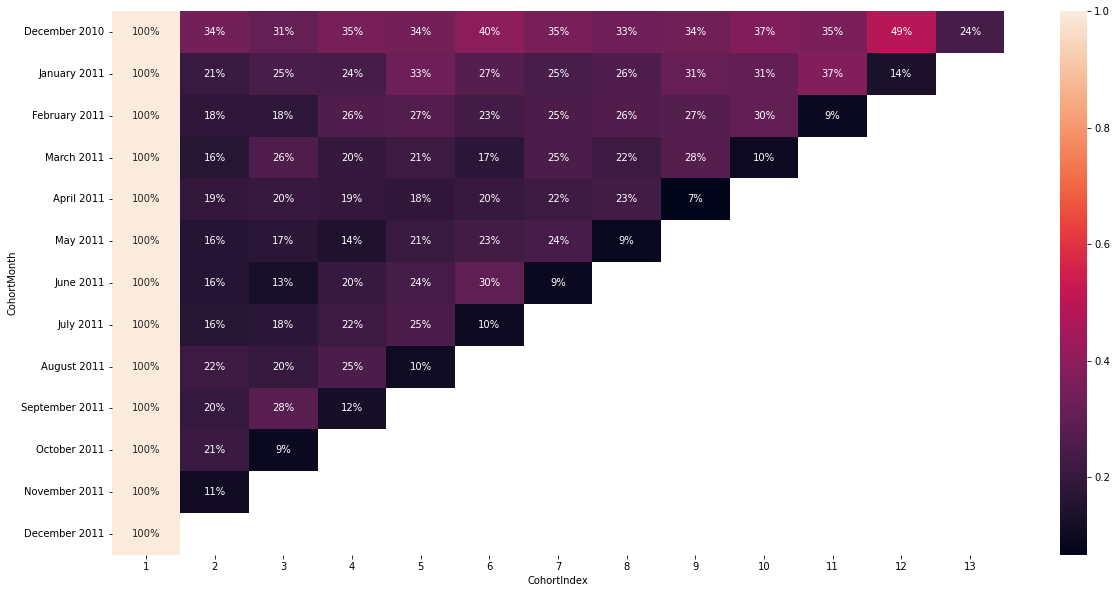

In [28]:
plt.figure(figsize=(20,10))
sns.heatmap(new_cohort_table,annot=True,fmt=".0%")